# Description of the notebook

Students:
- Teka Kimbi Ntimanputu (10673197)
- William Stucchi (10661711)
- Lorenzo Veronese (10654901)

This notebook has been obtain working on the transfer learning and fine-tuning. It performed the best on the dataset of phase 2 (accuracy=0.8420, precision=0.8227, recall=0.7447, F1=0.7818) and also well on the dataset of phase 2 (accuracy=0.9000, precision=0.9375, recall=0.7895, F1=0.8571). It is characterized by the following features:
- no upsampling of the minority class. Class weights are used instead.
- no upsampling of the training set.
- fine-tuning lead to very good performances on the validation set compared to the transfer learning training.
- data augmentation is performed.

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/MyDrive/Colab Notebooks/ANNDL/Challenge1

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/ANNDL/Challenge1


# Import libraries

In [ ]:
# Fix randomness and hide warnings
seed = 38

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)
from numpy import load

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [ ]:
# Import other libraries
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset

In [ ]:
#load data
data = load('public_data.npz', allow_pickle=True)
lst = data.files

In [ ]:
#Divide the dataset in image set and label set
img_set = data['data']
label_set = data['labels']

# Data cleaning

## Shrek

In [ ]:
# Select the reference image 'shrek' from the image set
shrek = img_set[58]

indexes_to_remove = []
for i in range(0, len(img_set)):
    # Check if the current image is identical to Shrek
    if np.array_equal(shrek, img_set[i]):
        indexes_to_remove.append(i)

print("Indexes to remove:", indexes_to_remove)
print("Number of indexes to remove:", len(indexes_to_remove))

Indexes to remove: [58, 95, 137, 138, 171, 207, 506, 571, 599, 622, 658, 692, 779, 827, 840, 880, 901, 974, 1028, 1265, 1268, 1280, 1333, 1443, 1466, 1483, 1528, 1554, 1594, 1651, 1806, 1866, 1938, 1977, 2022, 2081, 2090, 2261, 2311, 2328, 2380, 2435, 2451, 2453, 2515, 2663, 2665, 2675, 2727, 2734, 2736, 2755, 2779, 2800, 2830, 2864, 2866, 2913, 2937, 3033, 3055, 3105, 3144, 3155, 3286, 3410, 3488, 3572, 3583, 3666, 3688, 3770, 3801, 3802, 3806, 3811, 3862, 3885, 3927, 3931, 3946, 3988, 4097, 4118, 4144, 4150, 4282, 4368, 4475, 4476, 4507, 4694, 4740, 4779, 4857, 5082, 5121, 5171]
Number of indexes to remove: 98


In [ ]:
print("Length before removing Shrek: ", len(img_set))

img_set = img_set[~np.isin(np.arange(len(img_set)), indexes_to_remove)]
label_set = label_set[~np.isin(np.arange(len(label_set)), indexes_to_remove)]

print("Length after removing Shrek: ", len(img_set))

Length before removing Shrek:  5200
Length after removing Shrek:  5102


## Trololo

In [ ]:
# Select the reference image 'trololo' from the image set
trololo = img_set[332]  # Note: It is 332 AFTER removing Shrek


indexes_to_remove = []
for i in range(0, len(img_set)):
    # Check if the current image is identical to trololo
    if np.array_equal(trololo, img_set[i]):
         indexes_to_remove.append(i)

print("Indexes to remove:", indexes_to_remove)
print("Number of indexes to remove:", len(indexes_to_remove))

Indexes to remove: [332, 406, 428, 480, 522, 689, 711, 713, 741, 770, 882, 944, 954, 971, 1025, 1045, 1046, 1082, 1130, 1153, 1171, 1172, 1361, 1514, 1580, 1601, 1660, 1667, 1722, 1727, 1729, 1797, 1871, 1906, 1947, 1954, 2113, 2154, 2155, 2161, 2308, 2385, 2443, 2452, 2519, 2536, 2548, 2551, 2628, 2743, 2776, 2784, 2832, 2871, 2989, 3025, 3046, 3311, 3370, 3385, 3423, 3629, 3669, 3728, 3745, 3759, 3818, 3821, 3826, 3869, 3883, 3907, 3967, 3973, 4017, 4223, 4227, 4229, 4323, 4413, 4466, 4514, 4527, 4627, 4643, 4673, 4743, 4754, 4765, 4788, 4802, 4808, 4812, 4832, 4953, 4985, 5046, 5068]
Number of indexes to remove: 98


In [ ]:
# Print the original length of the image and label sets before removing 'Trololo'
print("Length before removing Trololo: ", len(img_set))

# Use NumPy's np.isin to create a boolean mask for removing 'Trololo'
# The mask will be True for the indices to keep and False for the indices to remove
img_set = img_set[~np.isin(np.arange(len(img_set)), indexes_to_remove)]
label_set = label_set[~np.isin(np.arange(len(label_set)), indexes_to_remove)]

# Print the length of the image and label sets after removing 'Trololo'
print("Length after removing Trololo: ", len(img_set))

Length before removing Trololo:  5102
Length after removing Trololo:  5004


# Training and validation set

Convert to categorical:
- healthy -> [1 0]
- unhealthy -> [0 1]

In [ ]:
# Define a mapping from label strings to numerical values
labels_string_to_num = {'healthy': 0, 'unhealthy': 1}

# Iterate through the label_set and replace label strings with their corresponding numerical values
for i in range(0, len(label_set)):
    label_set[i] = labels_string_to_num[label_set[i]]

# Expand the label_set to have an additional dimension
label_num = np.expand_dims(label_set, axis=-1)

print("Shape of numeric labels: ", label_num.shape)

# Convert numerical to one-hot encoding
label_cat = tfk.utils.to_categorical(label_num, num_classes=2)

print("Example of categorical label (healthy) after conversion: ", label_cat[0])

Shape of numeric labels:  (5004, 1)
Example of categorical label (healthy) after conversion:  [1. 0.]


Split between training and validation set with 85-15% as ratio:

In [ ]:
# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(img_set, label_cat, random_state=seed, test_size=.15, stratify=np.argmax(label_cat, axis=1))

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (4253, 96, 96, 3), y_train shape: (4253, 2)
X_val shape: (751, 96, 96, 3), y_val shape: (751, 2)


# Class weights

In [ ]:
num_healthy = sum(y == [1, 0] for y in y_train)[0]
num_unhealthy = len(y_train) - num_healthy

print(f"There are {num_healthy} healthy and {num_unhealthy} unhealthy")


# Calculate the total number of samples
total = num_healthy + num_unhealthy

# Calculate class weights for binary classification
# Class weight for 0 (healthy) is calculated based on the imbalance in the dataset
# Weight for class 0 is scaled to help keep the loss to a similar magnitude, ensuring that the sum of weights stays the same.
weight_for_0 = (1 / num_healthy) * (total / 2.0)
# Class weight for 1 (unhealthy) is similarly calculated, maintaining the same total weight.
weight_for_1 = (1 / num_unhealthy) * (total / 2.0)

# Create a dictionary that maps class labels to their corresponding class weights
class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0 (healthy): {:.2f}'.format(weight_for_0))
print('Weight for class 1 (unhealthy): {:.2f}'.format(weight_for_1))

There are 2636 healthy and 1617 unhealthy
Weight for class 0 (healthy): 0.81
Weight for class 1 (unhealthy): 1.32


# Transfer Learning

## Model

Import the model from Keras Applications (https://keras.io/api/applications/):

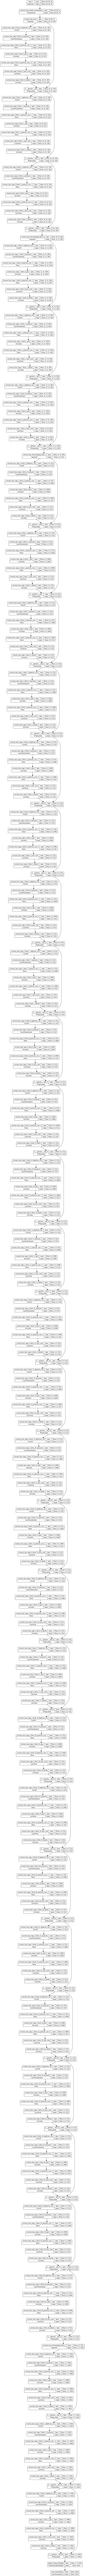

In [ ]:
convnext = tfk.applications.ConvNeXtBase(
    model_name="convnext_base",
    include_top=False,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96, 96, 3),
    pooling='avg',
    classifier_activation="softmax",
)
tfk.utils.plot_model(convnext, show_shapes=True)

Define the layers:

In [ ]:
# Use the supernet as feature extractor => freeze all its weigths
convnext.trainable = False

input = tfk.Input(shape=(96, 96, 3))

# Preprocessing
preprocessing = tf.keras.applications.convnext.preprocess_input(input)

# Augmentation
augmentation = tf.keras.Sequential([
        tfkl.RandomFlip('horizontal'),
        tfkl.RandomFlip('vertical'),
        tfkl.RandomTranslation(0.2,0.2),
        tfkl.RandomRotation(0.2),
        tfkl.RandomZoom(-0.2),
    ], name='preprocessing')
augment = augmentation(preprocessing)

# Connect MobileNetV2 to the input
x = convnext(augment)

# Output
outputs = tfkl.Dense(2, activation='softmax')(x)

# Connect input and output
tl_model = tfk.Model(inputs=input, outputs=outputs, name='model')

# Compile the model with Categorical Cross-Entropy loss and Adam optimizer
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 preprocessing (Sequential)  (None, 96, 96, 3)         0         
                                                                 
 convnext_base (Functional)  (None, 1024)              87566464  
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
Total params: 87568514 (334.05 MB)
Trainable params: 2050 (8.01 KB)
Non-trainable params: 87566464 (334.04 MB)
_________________________________________________________________


## Train

Train the model with early stopping:

In [ ]:
# Train the model
tl_history = tl_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    epochs = 200,
    validation_data = (X_val, y_val),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)],
    class_weight = class_weight
).history

Epoch 1/200
266/266 [==============================] - 77s 170ms/step - loss: 0.5811 - accuracy: 0.7056 - val_loss: 0.4945 - val_accuracy: 0.7603
Epoch 2/200
266/266 [==============================] - 33s 123ms/step - loss: 0.5039 - accuracy: 0.7609 - val_loss: 0.3774 - val_accuracy: 0.8149
Epoch 3/200
266/266 [==============================] - 30s 113ms/step - loss: 0.4666 - accuracy: 0.7733 - val_loss: 0.4024 - val_accuracy: 0.8069
Epoch 4/200
266/266 [==============================] - 32s 122ms/step - loss: 0.4408 - accuracy: 0.7945 - val_loss: 0.4143 - val_accuracy: 0.7949
Epoch 5/200
266/266 [==============================] - 29s 107ms/step - loss: 0.4382 - accuracy: 0.8011 - val_loss: 0.3516 - val_accuracy: 0.8455
Epoch 6/200
266/266 [==============================] - 27s 101ms/step - loss: 0.4340 - accuracy: 0.7957 - val_loss: 0.3429 - val_accuracy: 0.8349
Epoch 7/200
266/266 [==============================] - 28s 104ms/step - loss: 0.4237 - accuracy: 0.8095 - val_loss: 0.3355 -

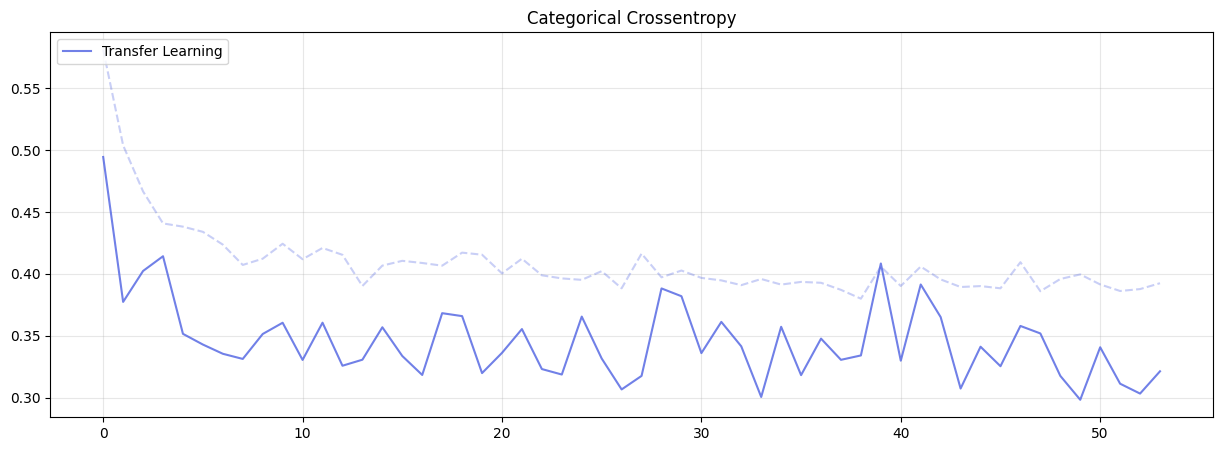

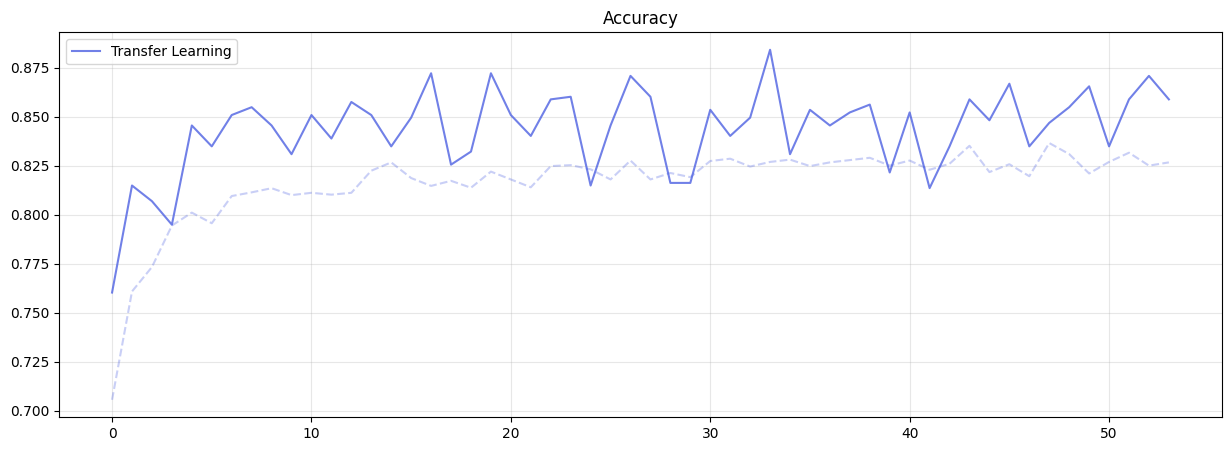

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(tl_history['loss'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_loss'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(tl_history['accuracy'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

## Save

In [ ]:
# Save the best model
tl_model.save('TransferLearning_ConvNeXtBase')
del tl_model

# Fine Tuning



## Unfreeze layers

In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('TransferLearning_ConvNeXtBase')
ft_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 preprocessing (Sequential)  (None, 96, 96, 3)         0         
                                                                 
 convnext_base (Functional)  (None, 1024)              87566464  
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
Total params: 87568514 (334.05 MB)
Trainable params: 2050 (8.01 KB)
Non-trainable params: 87566464 (334.04 MB)
_________________________________________________________________


In [ ]:
# Set all layers as trainable
ft_model.get_layer('convnext_base').trainable = True
for i, layer in enumerate(ft_model.get_layer('convnext_base').layers):
   print(i, layer.name, layer.trainable)

0 input_1 True
1 convnext_base_prestem_normalization True
2 convnext_base_stem True
3 convnext_base_stage_0_block_0_depthwise_conv True
4 convnext_base_stage_0_block_0_layernorm True
5 convnext_base_stage_0_block_0_pointwise_conv_1 True
6 convnext_base_stage_0_block_0_gelu True
7 convnext_base_stage_0_block_0_pointwise_conv_2 True
8 convnext_base_stage_0_block_0_layer_scale True
9 convnext_base_stage_0_block_0_identity True
10 tf.__operators__.add True
11 convnext_base_stage_0_block_1_depthwise_conv True
12 convnext_base_stage_0_block_1_layernorm True
13 convnext_base_stage_0_block_1_pointwise_conv_1 True
14 convnext_base_stage_0_block_1_gelu True
15 convnext_base_stage_0_block_1_pointwise_conv_2 True
16 convnext_base_stage_0_block_1_layer_scale True
17 convnext_base_stage_0_block_1_identity True
18 tf.__operators__.add_1 True
19 convnext_base_stage_0_block_2_depthwise_conv True
20 convnext_base_stage_0_block_2_layernorm True
21 convnext_base_stage_0_block_2_pointwise_conv_1 True
22 co

Freeze only the first N=260 layers:

In [ ]:
N = 260
for i, layer in enumerate(ft_model.get_layer('convnext_base').layers[:N]):
  layer.trainable=False
for i, layer in enumerate(ft_model.get_layer('convnext_base').layers):
   print(i, layer.name, layer.trainable)
ft_model.summary()

0 input_1 False
1 convnext_base_prestem_normalization False
2 convnext_base_stem False
3 convnext_base_stage_0_block_0_depthwise_conv False
4 convnext_base_stage_0_block_0_layernorm False
5 convnext_base_stage_0_block_0_pointwise_conv_1 False
6 convnext_base_stage_0_block_0_gelu False
7 convnext_base_stage_0_block_0_pointwise_conv_2 False
8 convnext_base_stage_0_block_0_layer_scale False
9 convnext_base_stage_0_block_0_identity False
10 tf.__operators__.add False
11 convnext_base_stage_0_block_1_depthwise_conv False
12 convnext_base_stage_0_block_1_layernorm False
13 convnext_base_stage_0_block_1_pointwise_conv_1 False
14 convnext_base_stage_0_block_1_gelu False
15 convnext_base_stage_0_block_1_pointwise_conv_2 False
16 convnext_base_stage_0_block_1_layer_scale False
17 convnext_base_stage_0_block_1_identity False
18 tf.__operators__.add_1 False
19 convnext_base_stage_0_block_2_depthwise_conv False
20 convnext_base_stage_0_block_2_layernorm False
21 convnext_base_stage_0_block_2_pointw

In [ ]:
# Compile the model
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=1e-5, weight_decay=5e-1), metrics='accuracy') #forse da diminuire e-1 da fare -2

## Train

Train:

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    epochs = 200,
    validation_data = (X_val, y_val),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)],
    class_weight = class_weight
).history

Epoch 1/200
266/266 [==============================] - 74s 178ms/step - loss: 0.3677 - accuracy: 0.8361 - val_loss: 0.3098 - val_accuracy: 0.8722
Epoch 2/200
266/266 [==============================] - 32s 119ms/step - loss: 0.3536 - accuracy: 0.8448 - val_loss: 0.2859 - val_accuracy: 0.8815
Epoch 3/200
266/266 [==============================] - 32s 122ms/step - loss: 0.3489 - accuracy: 0.8467 - val_loss: 0.2874 - val_accuracy: 0.8722
Epoch 4/200
266/266 [==============================] - 31s 117ms/step - loss: 0.3404 - accuracy: 0.8495 - val_loss: 0.2983 - val_accuracy: 0.8722
Epoch 5/200
266/266 [==============================] - 32s 122ms/step - loss: 0.3437 - accuracy: 0.8521 - val_loss: 0.2840 - val_accuracy: 0.8748
Epoch 6/200
266/266 [==============================] - 33s 122ms/step - loss: 0.3248 - accuracy: 0.8533 - val_loss: 0.2797 - val_accuracy: 0.8788
Epoch 7/200
266/266 [==============================] - 33s 124ms/step - loss: 0.3202 - accuracy: 0.8589 - val_loss: 0.2962 -

In [ ]:
# Plot the re-trained, the transfer learning and the fine-tuned MobileNetV2 training histories
plt.figure(figsize=(15,5))
plt.plot(tl_history['loss'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_loss'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.plot(ft_history['loss'], alpha=.3, color='#408537', linestyle='--')
plt.plot(ft_history['val_loss'], label='Fine Tuning', alpha=.8, color='#408537')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(tl_history['accuracy'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.plot(ft_history['accuracy'], alpha=.3, color='#408537', linestyle='--')
plt.plot(ft_history['val_accuracy'], label='Fine Tuning', alpha=.8, color='#408537')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

## Save

In [ ]:
# Save the best model
ft_model.save('FineTuningModel_ConvNeXtBase')
del ft_model